<a href="https://colab.research.google.com/github/amselhag/Pneumonia_Normal_Xray/blob/master/X_ray_Xception_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip Resources_2_Normal

Archive:  Resources_2_Normal.zip
   creating: Resources_2_Normal/test/
   creating: Resources_2_Normal/test/NORMAL/
  inflating: Resources_2_Normal/test/NORMAL/IM-0001-0001.jpeg  
  inflating: Resources_2_Normal/test/NORMAL/IM-0003-0001.jpeg  
  inflating: Resources_2_Normal/test/NORMAL/IM-0005-0001.jpeg  
  inflating: Resources_2_Normal/test/NORMAL/IM-0006-0001.jpeg  
  inflating: Resources_2_Normal/test/NORMAL/IM-0007-0001.jpeg  
  inflating: Resources_2_Normal/test/NORMAL/IM-0009-0001.jpeg  
  inflating: Resources_2_Normal/test/NORMAL/IM-0010-0001.jpeg  
  inflating: Resources_2_Normal/test/NORMAL/IM-0011-0001.jpeg  
  inflating: Resources_2_Normal/test/NORMAL/IM-0011-0001-0001.jpeg  
  inflating: Resources_2_Normal/test/NORMAL/IM-0011-0001-0002.jpeg  
  inflating: Resources_2_Normal/test/NORMAL/IM-0013-0001.jpeg  
  inflating: Resources_2_Normal/test/NORMAL/IM-0015-0001.jpeg  
  inflating: Resources_2_Normal/test/NORMAL/IM-0016-0001.jpeg  
  inflating: Resources_2_Normal/test/NORMA

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
# from keras.applications.inception_resnet_v2 import (
#     InceptionResNetV2, preprocess_input, decode_predictions)

from keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

from keras.preprocessing import image
# from keras.applications.imagenet_utils import preprocess_input
# from imagenet_utils import decode_predictions

from keras.layers import Dense, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import to_categorical, np_utils
from keras.models import load_model

Using TensorFlow backend.


In [0]:
def preprocess_image(img_path, target_size=(299,299), debug=False):
    """
    img_path - file path to specific image
    target_size - tuple of pixel image size
    """
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    if debug: print (x.shape)
    x = np.expand_dims(x, axis=0)
    if debug: print (x.shape)
    x = preprocess_input(x)
    if debug: print('Input image shape:', x.shape)
    return x

In [0]:
def get_images(image_dir, label, target_size=(299,299)):
    images = os.listdir(image_dir)
    preprocessed_images = []
    labels = []
    for image in images:
        image_path = os.path.join(image_dir, image)
        x = preprocess_image(image_path, target_size=target_size)
        x = np.squeeze(x, axis=0)
        preprocessed_images.append(x)
        labels.append(label)
    return (preprocessed_images, labels)

In [0]:
X_train = []
y_train = []

PATH = os.getcwd()
data_path = os.path.join(PATH,'Resources_2_Normal', 'train')
categories = ['NORMAL', 'PNEUMONIA']
categories_map = {category: i for i,category in enumerate(categories)}

for category in categories:
    image_dir = os.path.join(data_path, category)
    (preprocessed_images, labels) = get_images(image_dir, label=categories_map.get(category))
    X_train.extend(preprocessed_images)
    y_train.extend(labels)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [0]:
X_test = []
y_test = []

PATH = os.getcwd()
data_path = os.path.join(PATH,'Resources_2_Normal', 'test')
categories = ['NORMAL','PNEUMONIA']
categories_map = {category: i for i,category in enumerate(categories)}

for category in categories:
    image_dir = os.path.join(data_path, category)
    (preprocessed_images, labels) = get_images(image_dir, label=categories_map.get(category))
    X_test.extend(preprocessed_images)
    y_test.extend(labels)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [0]:
categories_map

{'NORMAL': 0, 'PNEUMONIA': 1}

In [0]:
from collections import Counter
Counter(y_train)

Counter({0: 1341, 1: 1341})

In [0]:
# Define the number of classes
num_classes = len(categories)
# convert class labels to on-hot encoding
y_train = np_utils.to_categorical(y_train, num_classes)


In [0]:
y_train.shape

(2682, 2)

In [0]:
y_test=np_utils.to_categorical(y_test, num_classes)

In [0]:
y_test.shape

(624, 2)

In [0]:
# input = Input(shape=(299, 299, 3))
# base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=input, input_shape=(299, 299, 3), pooling='avg', classes=1000)
# for l in base_model.layers:
#     l.trainable = False

# t = base_model(input)
# o = Dense(3, activation='softmax')(t)
# model = Model(inputs=input, outputs=o)

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Custom_Xception_model_1
#Training the classifier alone
image_input = Input(shape=(299, 299, 3))

model = Xception(
    input_shape=(299,299,3),
    include_top=False,
    weights='imagenet')

x = model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation="softmax")(x)

custom_xception_model = Model(model.input, predictions)

for layer in model.layers:
    layer.trainable = False

custom_xception_model.summary()
    
custom_xception_model.layers[3].trainable

custom_xception_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
83689472/83683744 [==============================] - 2s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1

In [17]:
history = custom_xception_model.fit(X_train, y_train, batch_size=32, validation_data = (X_test , y_test), epochs=5, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 2682 samples, validate on 624 samples
Epoch 1/5
2682/2682 [==============================] - 4428s 2s/step - loss: 0.3553 - acc: 0.8781 - val_loss: 0.6076 - val_acc: 0.6667
Epoch 2/5
2682/2682 [==============================] - 4561s 2s/step - loss: 0.2101 - acc: 0.9269 - val_loss: 0.4640 - val_acc: 0.7981
Epoch 3/5
2682/2682 [==============================] - 4085s 2s/step - loss: 0.1845 - acc: 0.9355 - val_loss: 0.3725 - val_acc: 0.8413
Epoch 4/5
2682/2682 [==============================] - 2265s 844ms/step - loss: 0.1748 - acc: 0.9396 - val_loss: 0.4732 - val_acc: 0.7901
Epoch 5/5
2682/2682 [==============================] - 2252s 840ms/step - loss: 0.1464 - acc: 0.9526 - val_loss: 0.3530 - val_acc: 0.8397


In [0]:
model.save("custom_Xception_Normal_balanced.h5")

In [19]:
print(custom_xception_model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

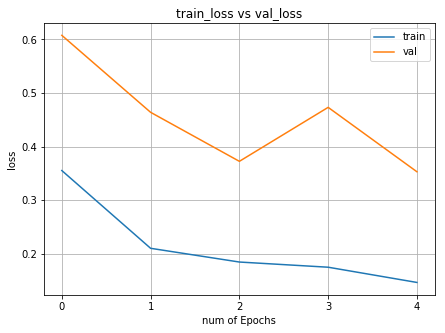

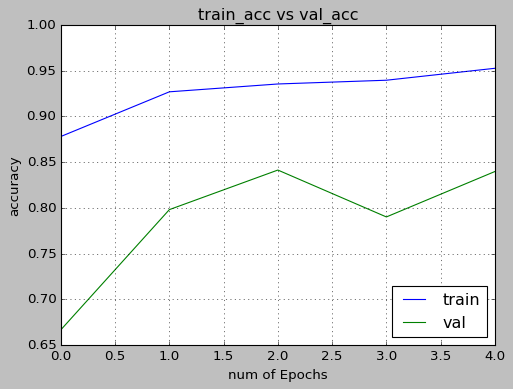

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']
xc=range(len(train_loss))

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])